In [3]:
import os
import os.path as op
from glob import glob
import numpy as np
import pandas as pd
import nibabel as nib
import scipy.ndimage as ndimage
from nilearn import plotting
from nilearn import datasets
from nilearn import surface
import sys
sys.path.append(op.join(op.expanduser("~"), "code"))
import general.nifti.nifti_ops as nops
import general.basic.str_methods as strm

In [11]:
from importlib import reload
reload(nops)

<module 'general.nifti.nifti_ops' from '/Users/dschonhaut/code/general/nifti/nifti_ops.py'>

In [6]:
# Load freesurfer ROI spreadsheet.
data_dir = "/Users/dschonhaut/Box/projects/leads_tau_spread/data/ssheets"
fsrois = pd.read_csv(op.join(data_dir, "fsrois.csv"))
fsrois["roi24"].unique()

array(['erc', 'amy', 'phg', 'fsf', 'itg', 'mtg', 'tp', 'stg', 'smg',
       'ipc', 'spc', 'prcu', 'pcc', 'ling', 'cun', 'locc', 'v1', 'ins',
       'sfg', 'mfg', 'ifg', 'ofc', 'acc', 'ssm'], dtype=object)

In [5]:
# Convert fslabels to specroi labels.

# Load freesurfer ROI spreadsheet.
data_dir = "/Users/dschonhaut/Box/projects/leads_tau_spread/data/ssheets"
fsrois = pd.read_csv(op.join(data_dir, "fsrois.csv"))

# Set up conversion.
template_dir = op.join(op.expanduser("~"), "box", "projects/leads_tau_spread/data/template_rois")
infile = op.join(template_dir, "aparcaseg_DK_1mm.nii.gz")
outfile = None
convert_from = "fs_label"
convert_to = "roi24_order"
convert_to_name = "roi24"
save_bilat = False
save_single_file = True
save_mult_files = True
overwrite = True

# Run conversion and save the output file or files.

if save_bilat:
    rois = fsrois
    if outfile is None:
        outfile = op.join(op.dirname(infile), strm.add_presuf(op.basename(infile), prefix=f"{convert_to_name}-"))
    outfile_map = {val: op.join(op.dirname(outfile), strm.add_presuf(op.basename(outfile), prefix=f"{name}-"))
                   for val, name in zip(rois[convert_to], rois[convert_to_name])}
else:
    keep_hem = "L"
    rois = fsrois.loc[fsrois["hem"]==keep_hem]
    if outfile is None:
        outfile = op.join(op.dirname(infile), strm.add_presuf(op.basename(infile), prefix=f"{keep_hem}_{convert_to_name}-"))
    outfile_map = {val: op.join(op.dirname(outfile), strm.add_presuf(op.basename(outfile), prefix=f"{keep_hem}_{name}-"))
                   for val, name in zip(rois[convert_to], rois[convert_to_name])}

value_map = rois.set_index(convert_from)[convert_to].to_dict()

if save_single_file:
    outfile = nops.convert_values(
        infile=infile,
        value_map=value_map,
        outfile=outfile,
        overwrite=overwrite
        )
if save_mult_files:
    outfiles = nops.convert_values(
        infile=infile,
        value_map=value_map,
        outfile_map=outfile_map,
        overwrite=overwrite
        )

Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_roi24-aparcaseg_DK_1mm.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_erc-L_roi24-aparcaseg_DK_1mm.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_amy-L_roi24-aparcaseg_DK_1mm.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_phg-L_roi24-aparcaseg_DK_1mm.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_fsf-L_roi24-aparcaseg_DK_1mm.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_itg-L_roi24-aparcaseg_DK_1mm.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_mtg-L_roi24-aparcaseg_DK_1mm.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_tp-L_roi24-aparcaseg_DK_1mm.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_stg-L_roi24-aparcaseg_DK_1mm.nii.gz
Saved /U

In [54]:
def dilate_mask(dat, dilate_by=1):
    """Dilate a binary mask by a specified number of voxels."""
    return ndimage.binary_dilation(dat, iterations=dilate_by).astype(dat.dtype)

In [56]:
# Dilate the rois.
dilate_by = 4
overwrite = False
save_output = True

# ---------------------------
# Get paths to the input ROI files.
inroifs = {roi: nops.find_gzip(op.join(template_dir, f"L_{roi}-L_specroi-aparcaseg_DK_1mm.nii.gz"))
           for roi in rois["specroi"].unique()}

# Dilate the rois.
for roi, infile in inroifs.items():
    outfile = op.join(op.dirname(infile), strm.add_presuf(op.basename(infile), suffix=f"-dil{dilate_by}"))
    if overwrite or not op.exists(outfile):
        img, indat = nops.load_nii(infile, binarize=True)
        outdat = ndimage.binary_dilation(indat, iterations=dilate_by).astype(dat.dtype)
        # Save the individual dilated ROI files.
        nops.save_nii(img, outdat, outfile, overwrite)

Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_mtl-L_specroi-aparcaseg_DK_1mm-dil4.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_itc-L_specroi-aparcaseg_DK_1mm-dil4.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_mtc-L_specroi-aparcaseg_DK_1mm-dil4.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_stc-L_specroi-aparcaseg_DK_1mm-dil4.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_pcc-L_specroi-aparcaseg_DK_1mm-dil4.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_pcu-L_specroi-aparcaseg_DK_1mm-dil4.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_ipc-L_specroi-aparcaseg_DK_1mm-dil4.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_spc-L_specroi-aparcaseg_DK_1mm-dil4.nii.gz
Saved /Users/dschonhaut/box/projects/leads_tau_spread/da

In [63]:
roi_labels

{1: 'mtl',
 2: 'itc',
 3: 'mtc',
 4: 'stc',
 5: 'pcc',
 6: 'pcu',
 7: 'ipc',
 8: 'spc',
 9: 'occ',
 10: 'v1',
 11: 'ins',
 12: 'vlpfc',
 13: 'dlpfc',
 14: 'acc',
 15: 'vmpfc',
 16: 'smc'}

In [66]:
# Save a single file.
overwrite = True
save_single_file = True
save_mult_files = False

# ---------------------------------------------------
# Get the volume of each roi.
roi_vols = {}
for roi, infile in inroifs.items():
    img, dat = nops.load_nii(infile, binarize=True)
    roi_vols[roi] = np.count_nonzero(dat)
roi_vols = pd.Series(roi_vols)

# Get paths to the dilated ROI files.
inroifs_dil = {roi: nops.find_gzip(op.join(template_dir, f"L_{roi}-L_specroi-aparcaseg_DK_1mm-dil{dilate_by}.nii.gz"))
               for roi in rois["specroi"].unique()}

# Merge dilated ROIs into a single array, keeping separate value labels
# for each ROI.
roi_labels = rois[["specroi", "specroi_label"]].drop_duplicates().set_index("specroi")["specroi_label"].to_dict()
img, indat = nops.load_nii(list(inroifs_dil.values())[0], binarize=True)
outdat = np.zeros_like(dat)
for roi, vol in roi_vols.sort_values(ascending=False).items():
    infile = inroifs_dil[roi]
    img, indat = nops.load_nii(infile, binarize=True)
    outdat[np.where(indat)] = roi_labels[roi]

if save_single_file:
    outfile = op.join(template_dir, f"L_specroi-aparcaseg_DK_1mm-dil{dilate_by}.nii.gz")
    outfile = nops.save_nii(img, outdat, outfile, overwrite)
# if save_mult_files:
#     outfiles = nops.convert_values(
#         infile=infile,
#         value_map=value_map,
#         outfile_map=outfile_map,
#         overwrite=overwrite
#         )

Saved /Users/dschonhaut/box/projects/leads_tau_spread/data/template_rois/L_specroi-aparcaseg_DK_1mm-dil4.nii.gz


In [52]:
np.count_nonzero(dat), np.count_nonzero(dat_dil)

(6498, 28939)

In [36]:
# Fix spec-roi_dil values.

# Load spec-roi_dil image.
# infile = op.join(template_dir, "L_specroi-aparcaseg_DK_1mm.nii.gz")
infile = op.join(template_dir, "L_specroi_dil_log-aparcaseg_DK_1mm_roi.nii.gz")
img, dat = nops.load_nii(infile, dtype=int)

# Save dat unique values and counts as a pandas dataframe.
values_counts = pd.DataFrame(np.unique(dat, return_counts=True)).T
values_counts.columns = ["value", "count"]

print(values_counts.shape)


(14, 2)


In [35]:
values_counts.sort_values("count", ascending=False).head(10)

,value,count
0,0,16610225
13,13,30135
16,16,22745
7,7,13455
9,9,12795
2,2,12168
4,4,12149
15,15,10774
3,3,8906
8,8,7496


In [37]:
values_counts.sort_values("count", ascending=False).head(10)

,value,count
0,0,16389214
10,22,81881
11,24,61096
3,6,41318
2,4,33049
12,30,28510
7,12,24987
6,11,24106
13,31,23460
1,1,21892


In [37]:
img.agg_data("NIFTI_INTENT_POINTSET"), img.agg_data("NIFTI_INTENT_TRIANGLE")

(array([[-38.73596 , -19.343365,  67.22014 ],
        [-16.662487, -69.061226,  61.281273],
        [ -9.717618,  -9.233264,  46.58034 ],
        ...,
        [-30.751953, -27.045898, -27.080143],
        [-32.775867, -25.899866, -25.520136],
        [-34.49119 , -25.403906, -24.645117]], dtype=float32),
 array([[    0,  2564,  2562],
        [    0,  2562,  2565],
        [    0,  2565,  2567],
        ...,
        [10241,  9918,  2454],
        [10161,  9918, 10241],
        [10161,    11,  9918]], dtype=int32))

In [36]:
img = nib.load(fsaverage["pial_left"])
img.agg_data()[0].shape, img.agg_data()[1].shape
img.get_arrays_from_intent("NIFTI_INTENT_POINTSET")[0].data

array([[-38.73596 , -19.343365,  67.22014 ],
       [-16.662487, -69.061226,  61.281273],
       [ -9.717618,  -9.233264,  46.58034 ],
       ...,
       [-30.751953, -27.045898, -27.080143],
       [-32.775867, -25.899866, -25.520136],
       [-34.49119 , -25.403906, -24.645117]], dtype=float32)

In [23]:
img.agg_data()[0], img.agg_data()[1]

(array([[-38.73596 , -19.343365,  67.22014 ],
        [-16.662487, -69.061226,  61.281273],
        [ -9.717618,  -9.233264,  46.58034 ],
        ...,
        [-30.751953, -27.045898, -27.080143],
        [-32.775867, -25.899866, -25.520136],
        [-34.49119 , -25.403906, -24.645117]], dtype=float32),
 array([[    0,  2564,  2562],
        [    0,  2562,  2565],
        [    0,  2565,  2567],
        ...,
        [10241,  9918,  2454],
        [10161,  9918, 10241],
        [10161,    11,  9918]], dtype=int32))

In [19]:
parcellation

array([29, 27,  8, ..., 23, 62, 62], dtype=int32)

In [4]:
# Retrieve destrieux parcellation in fsaverage5 space from nilearn
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()

# The parcellation is already loaded into memory
parcellation = destrieux_atlas['map_left']

# Retrieve fsaverage5 surface dataset for the plotting background. It contains
# the surface template as pial and inflated version and a sulcal depth maps
# which is used for shading
fsaverage = datasets.fetch_surf_fsaverage()

# The fsaverage dataset contains file names pointing to the file locations
print('Fsaverage5 pial surface of left hemisphere is at: %s' %
      fsaverage['pial_left'])
print('Fsaverage5 inflated surface of left hemisphere is at: %s' %
      fsaverage['infl_left'])
print('Fsaverage5 sulcal depth map of left hemisphere is at: %s' %
      fsaverage['sulc_left'])

Fsaverage5 pial surface of left hemisphere is at: /Users/dschonhaut/mambaforge/envs/nipy310/lib/python3.10/site-packages/nilearn/datasets/data/fsaverage5/pial_left.gii.gz
Fsaverage5 inflated surface of left hemisphere is at: /Users/dschonhaut/mambaforge/envs/nipy310/lib/python3.10/site-packages/nilearn/datasets/data/fsaverage5/infl_left.gii.gz
Fsaverage5 sulcal depth map of left hemisphere is at: /Users/dschonhaut/mambaforge/envs/nipy310/lib/python3.10/site-packages/nilearn/datasets/data/fsaverage5/sulc_left.gii.gz


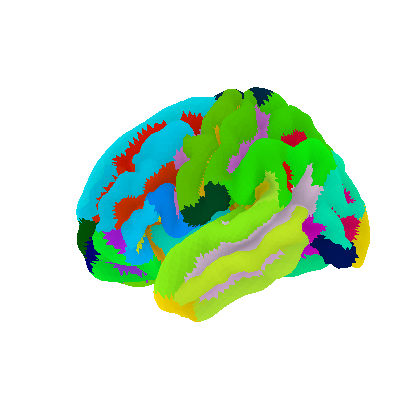

In [3]:
# Display Destrieux parcellation on fsaverage5 pial surface using nilearn
_ = plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=parcellation,
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       darkness=.5)

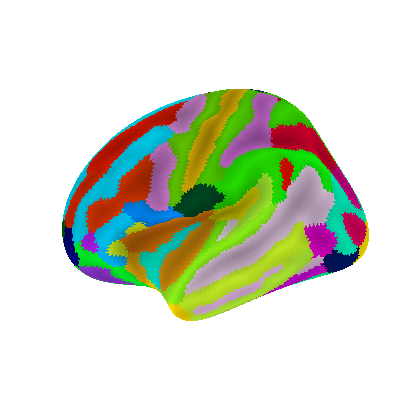

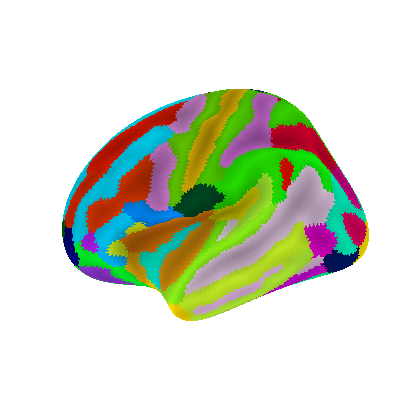

In [4]:
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation,
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       darkness=.5)

In [1]:
import os
import numpy as np
import nibabel as nib
from surfer import Brain
%gui qt

print(__doc__)

subject_id = "fsaverage"
hemi = "lh"
surf = "inflated"

"""
Bring up the visualization.
"""
brain = Brain(subject_id, hemi, surf, background="white")

"""
Read in the automatic parcellation of sulci and gyri.
"""
aparc_file = os.path.join(os.environ["SUBJECTS_DIR"],
                          subject_id, "label",
                          hemi + ".aparc.a2009s.annot")
labels, ctab, names = nib.freesurfer.read_annot(aparc_file)

"""
Make a random vector of scalar data corresponding to a value for each region in
the parcellation.

"""
rs = np.random.RandomState(4)
roi_data = rs.uniform(.5, .8, size=len(names))

"""
Make a vector containing the data point at each vertex.
"""
vtx_data = roi_data[labels]

"""
Handle vertices that are not defined in the annotation.
"""
vtx_data[labels == -1] = -1

"""
Display these values on the brain. Use a sequential colormap (assuming
these data move from low to high values), and add an alpha channel so the
underlying anatomy is visible.
"""
brain.add_data(vtx_data, .5, .75, thresh=0, colormap="rocket", alpha=.8)

Automatically created module for IPython interactive environment


ValueError: The subjects directory has to be specified using the subjects_dir parameter or the SUBJECTS_DIR environment variable.

# Nifti slices

In [158]:
def plot_slices(infile, slices, display_mode="z", ax=None, cmap="binary", vmin=0, vmax=None, **kws):
    if ax is None:
        fig, ax = plt.subplots(1, len(slices), figsize=(4*len(slices), 4))
    else:
        fig = ax[0].get_figure()

    for i, sl in enumerate(slices):
    #     if display_mode == "z":
    #         cut_coords = [sl]
    #     elif display_mode == "y":
    #         cut_coords = [sl]
    #         image = np.swapaxes(image, 0, 1)
    #     elif display_mode == "x":
    #         cut_coords = [sl]
    #         image = np.swapaxes(image, 0, 2)

        plotting.plot_anat(
            infile,
            cut_coords=slices,
            display_mode=display_mode,
            black_bg=True,
            colorbar=False,
            cmap=cmap,
            vmin=vmin,
            vmax=vmax,
            axes=ax[i],
            **kws
        )

    # create horizontal colorbar
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(
        plt.cm.ScalarMappable(norm=norm, cmap=palette),
        ax=ax,
        location='bottom',
        pad=0.1,
        shrink=0.8,
        aspect=30,
    )
    cbar.ax.tick_params(labelsize=8)
    cbar.ax.set_xlabel("Intensity", fontsize=10)

    return ax

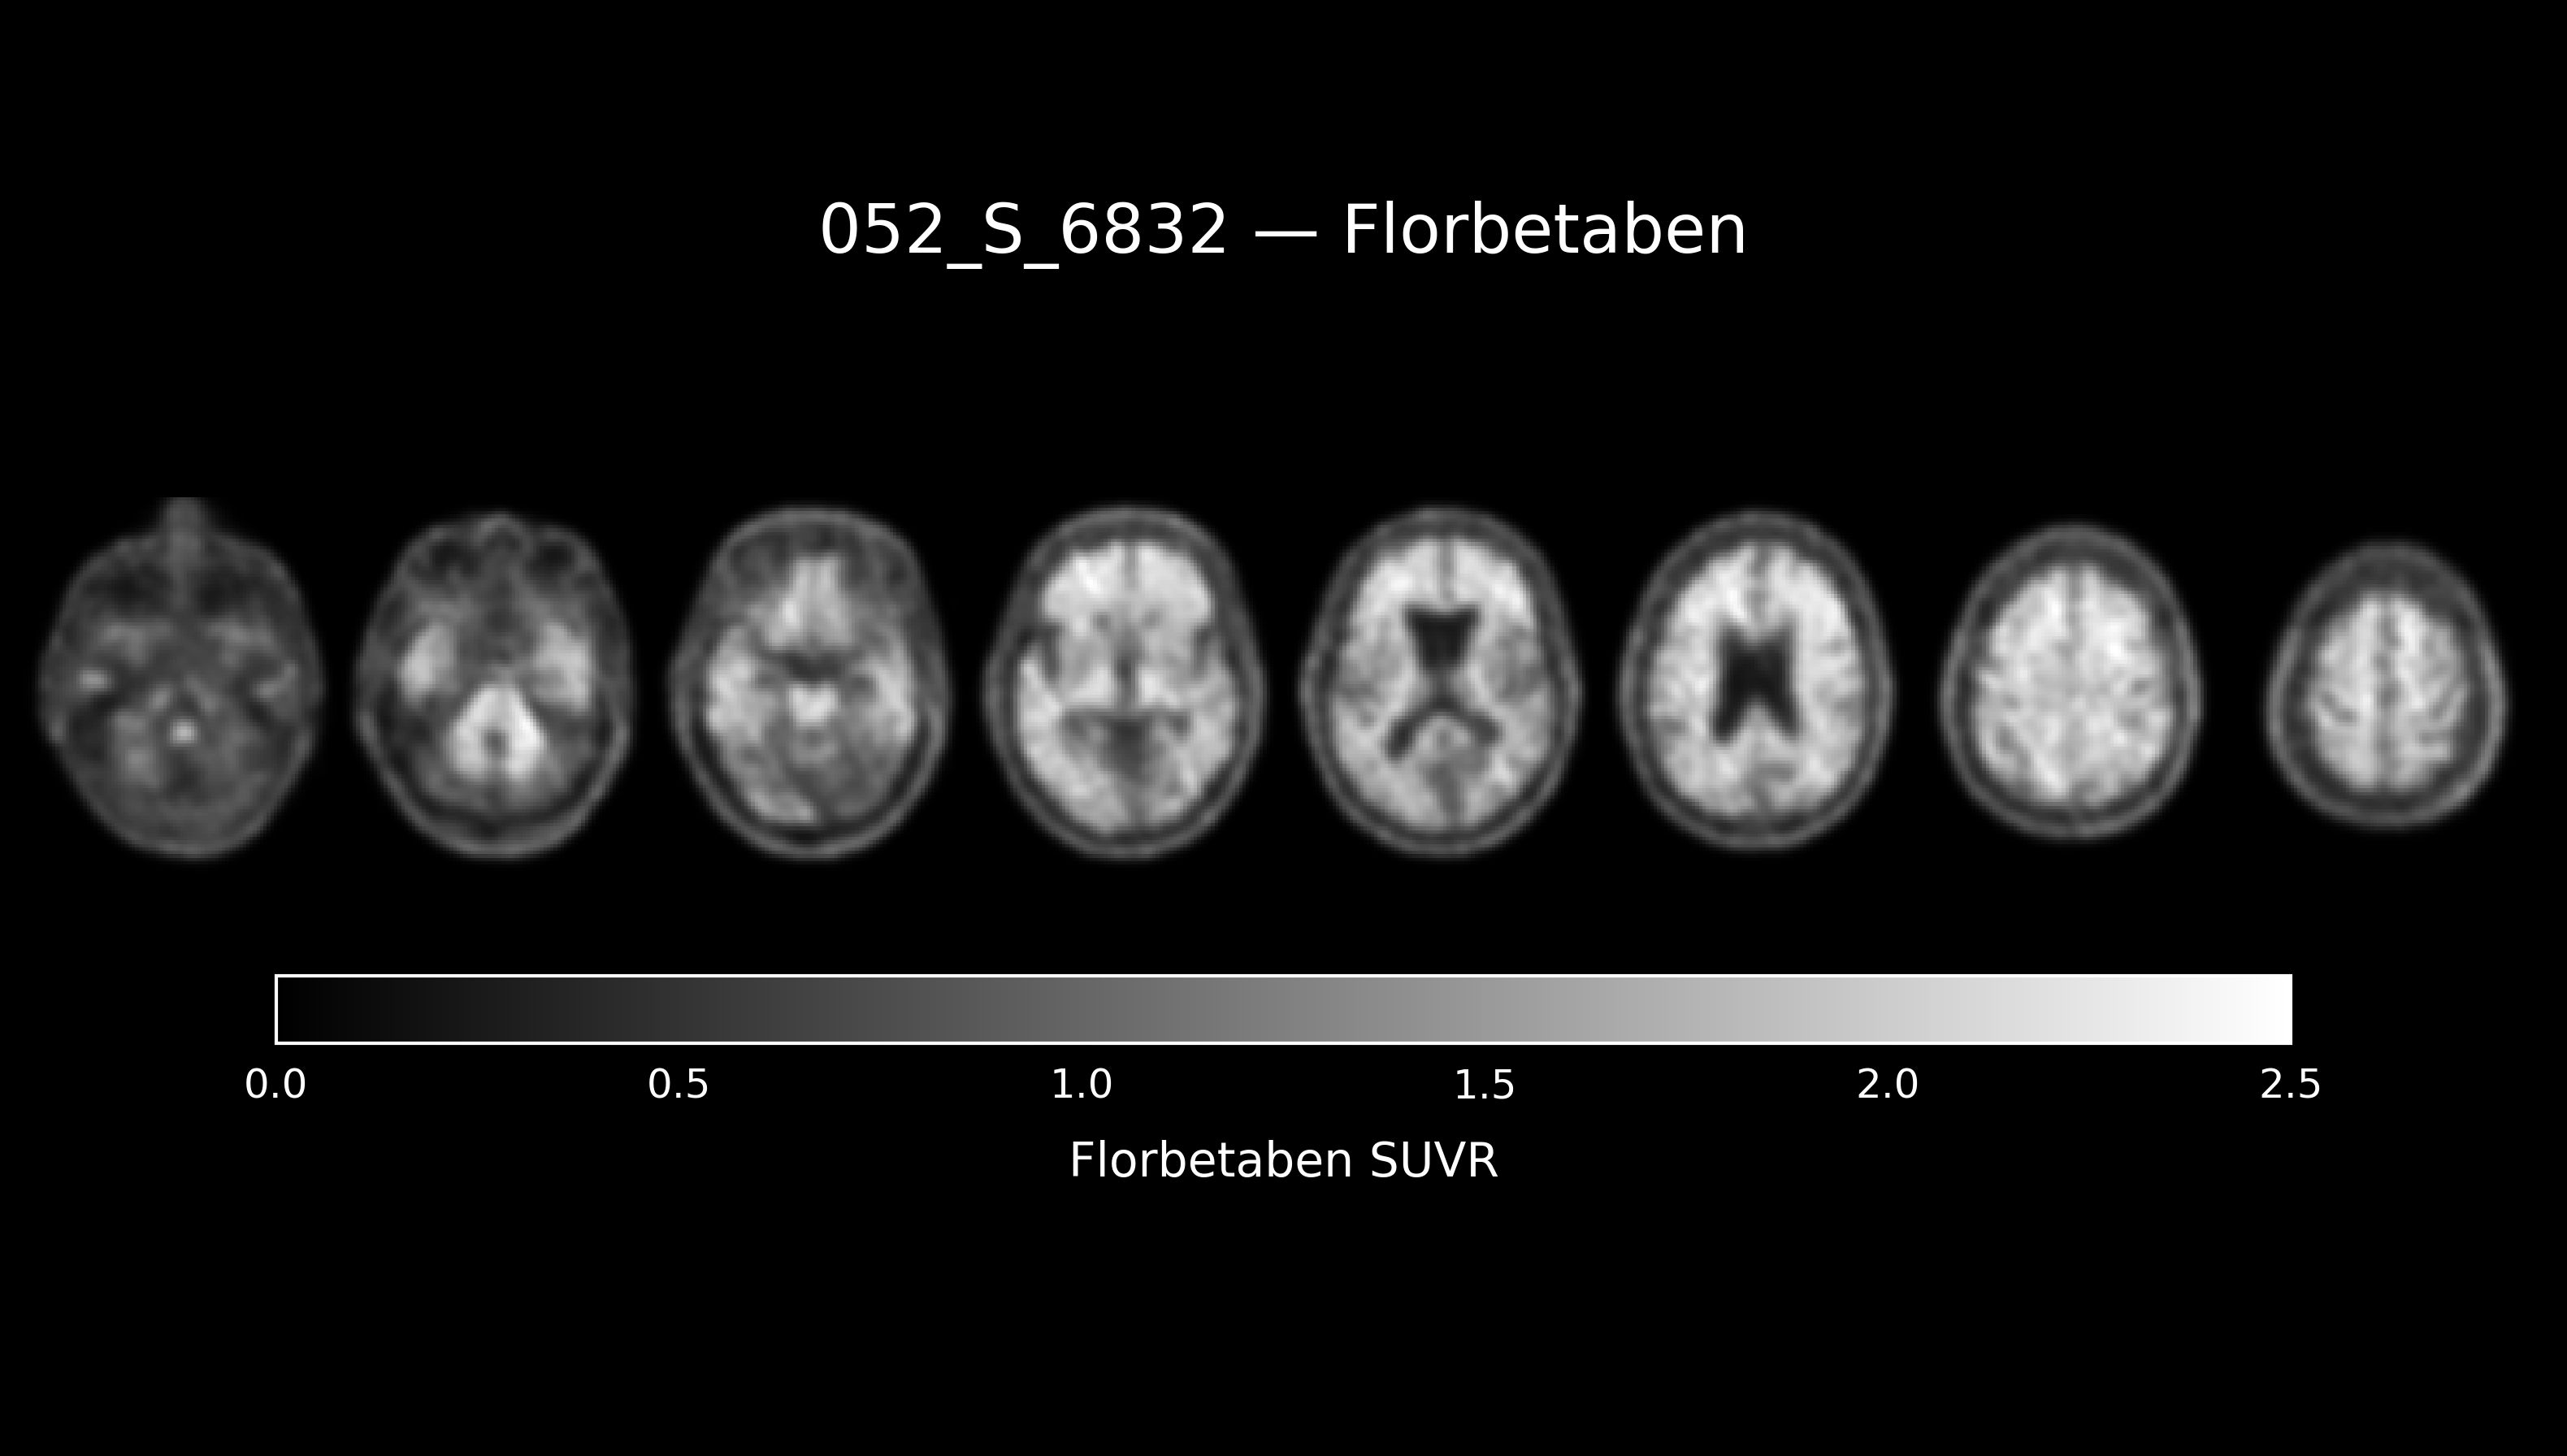

In [206]:
base_dir = "/Volumes/petcore/Projects/ADNI_Reads/data/proc"
subj = "052_S_6832"
tracer = "FBB"
infiles = glob(op.join(base_dir, f"sub-{subj}", "**", "rs8mean_*.nii*"), recursive=True)
assert len(infiles) == 1

infile = infiles[0]
display_mode = "z"
cut_coords = [-51, -30, -21, -6, 9, 24, 39, 54]
annotate = False
draw_cross = False
colorbar = False
cbar_tick_format = "%.2f"
title = None
fig = None
ax = None
figsize = (13.33, 7.5)
dpi = 300
font = {"tick": 12, "label": 14, "title": 20, "annot": 12}

# ----------------------------------------------------------------------
tracer_fancy = {"FBB": "Florbetaben", "FBP": "Florbetapir"}[tracer]
if tracer == "FBB":
    cmap = "binary_r"
    vmin = 0
    vmax = 2.5
    cbar_ticks = [0, 0.5, 1, 1.5, 2, 2.5]
    facecolor = "k"
    fontcolor = "w"
    black_bg = True
elif tracer == "FBP":
    cmap = "binary"
    vmin = 0
    vmax = 2.2
    cbar_ticks = [0, 0.5, 1, 1.5, 2, 2.5]
    facecolor = "w"
    fontcolor = "k"
    black_bg = False

# Make the plot.
plt.close("all")
fig, ax = plt.subplots(3, 1, height_ratios=[1.2, 6, 1.8], figsize=figsize, dpi=dpi)
ax = np.ravel(ax)

iax = 1
_ax = ax[iax]
display = plotting.plot_anat(
    infile,
    cut_coords=cut_coords,
    display_mode=display_mode,
    annotate=annotate,
    draw_cross=draw_cross,
    black_bg=black_bg,
    cmap=cmap,
    colorbar=colorbar,
    cbar_tick_format=cbar_tick_format,
    vmin=vmin,
    vmax=vmax,
    title=title,
    figure=fig,
    axes=_ax,
    )

# Add the colorbar.
norm = plt.Normalize(vmin=vmin, vmax=vmax)
cbar = plt.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap),
    ax=_ax,
    location='bottom',
    pad=0.1,
    shrink=0.8,
    aspect=30,
    drawedges=False,
)
cbar.outline.set_color(fontcolor)
cbar.outline.set_linewidth(1)
cbar.ax.tick_params(labelsize=font["tick"], labelcolor=fontcolor)
cbar.ax.set_xticks(cbar_ticks)
cbar.ax.set_xlabel(f"{tracer_fancy} SUVR", fontsize=font["label"], color=fontcolor, labelpad=10)

# Format the top and bottom of the figure.
for iax in [0, 2]:
    _ax = ax[iax]
    _ax.axis("off")

_ax = ax[1]
_ax.set_title(f"{subj} — {tracer_fancy}", fontsize=font["title"], color=fontcolor)

for iax in range(len(ax)):
    _ax = ax[iax]
    _ax.set_facecolor(facecolor)
fig.patch.set_facecolor(facecolor)

# Color palettes

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
colors = {
"blue3": "#141F52",
"blue2": "#2E45B8",
"blue1": "#D6DBF5",
"red3": "#861320",
"red2": "#E3120B",
"red1": "#FFA39F",
"cyan3": "#005F73",
"cyan2": "#3EBCD2",
"cyan1": "#6FE4FB",
"green3": "#0E6452",
"green2": "#1DC9A4",
"green1": "#D2F9F0",
"orange2": "#F97A1F",
"orange1": "#FCB583",
"yellow2": "#F9C31F",
"yellow1": "#FCDE83",
"beige1": "#E1DFD0",
"teal1": "#D0E1E1",
"black": "#000000",
"gray5": "#333333",
"gray4": "#595959",
"gray3": "#B3B3B3",
"gray2": "#D9D9D9",
"gray1": "#F2F2F2",
"white": "#FFFFFF",
# "magenta3": "#781127",
# "magenta2": "#C91D42",
# "magenta1": "#F9D2DB",
}


# --------------------------------------
# Create a color palette
plt.close("all")
sns.color_palette(colors.values())

[(0.0784313725490196, 0.12156862745098039, 0.3215686274509804),
 (0.1803921568627451, 0.27058823529411763, 0.7215686274509804),
 (0.8392156862745098, 0.8588235294117647, 0.9607843137254902),
 (0.5254901960784314, 0.07450980392156863, 0.12549019607843137),
 (0.8901960784313725, 0.07058823529411765, 0.043137254901960784),
 (1.0, 0.6392156862745098, 0.6235294117647059),
 (0.0, 0.37254901960784315, 0.45098039215686275),
 (0.24313725490196078, 0.7372549019607844, 0.8235294117647058),
 (0.43529411764705883, 0.8941176470588236, 0.984313725490196),
 (0.054901960784313725, 0.39215686274509803, 0.3215686274509804),
 (0.11372549019607843, 0.788235294117647, 0.6431372549019608),
 (0.8235294117647058, 0.9764705882352941, 0.9411764705882353),
 (0.9764705882352941, 0.47843137254901963, 0.12156862745098039),
 (0.9882352941176471, 0.7098039215686275, 0.5137254901960784),
 (0.9764705882352941, 0.7647058823529411, 0.12156862745098039),
 (0.9882352941176471, 0.8705882352941177, 0.5137254901960784),
 (0.8823529411764706, 0.8745098039215686, 0.8156862745098039),
 (0.8156862745098039, 0.8823529411764706, 0.8823529411764706),
 (0.0, 0.0, 0.0),
 (0.2, 0.2, 0.2),
 (0.34901960784313724, 0.34901960784313724, 0.34901960784313724),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372),
 (1.0, 1.0, 1.0),
 (0.47058823529411764, 0.06666666666666667, 0.15294117647058825),
 (0.788235294117647, 0.11372549019607843, 0.25882352941176473),
 (0.9764705882352941, 0.8235294117647058, 0.8588235294117647)]